<a href="https://colab.research.google.com/github/jonathan093084/analisis_datos/blob/main/Clase_Julio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **storytelling**

In [1]:
# Abrir el archivo
import pandas as pd

df=pd.read_csv("/content/super_store.csv")

# Mostramos un resumen estadístico de los datos numéricos
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


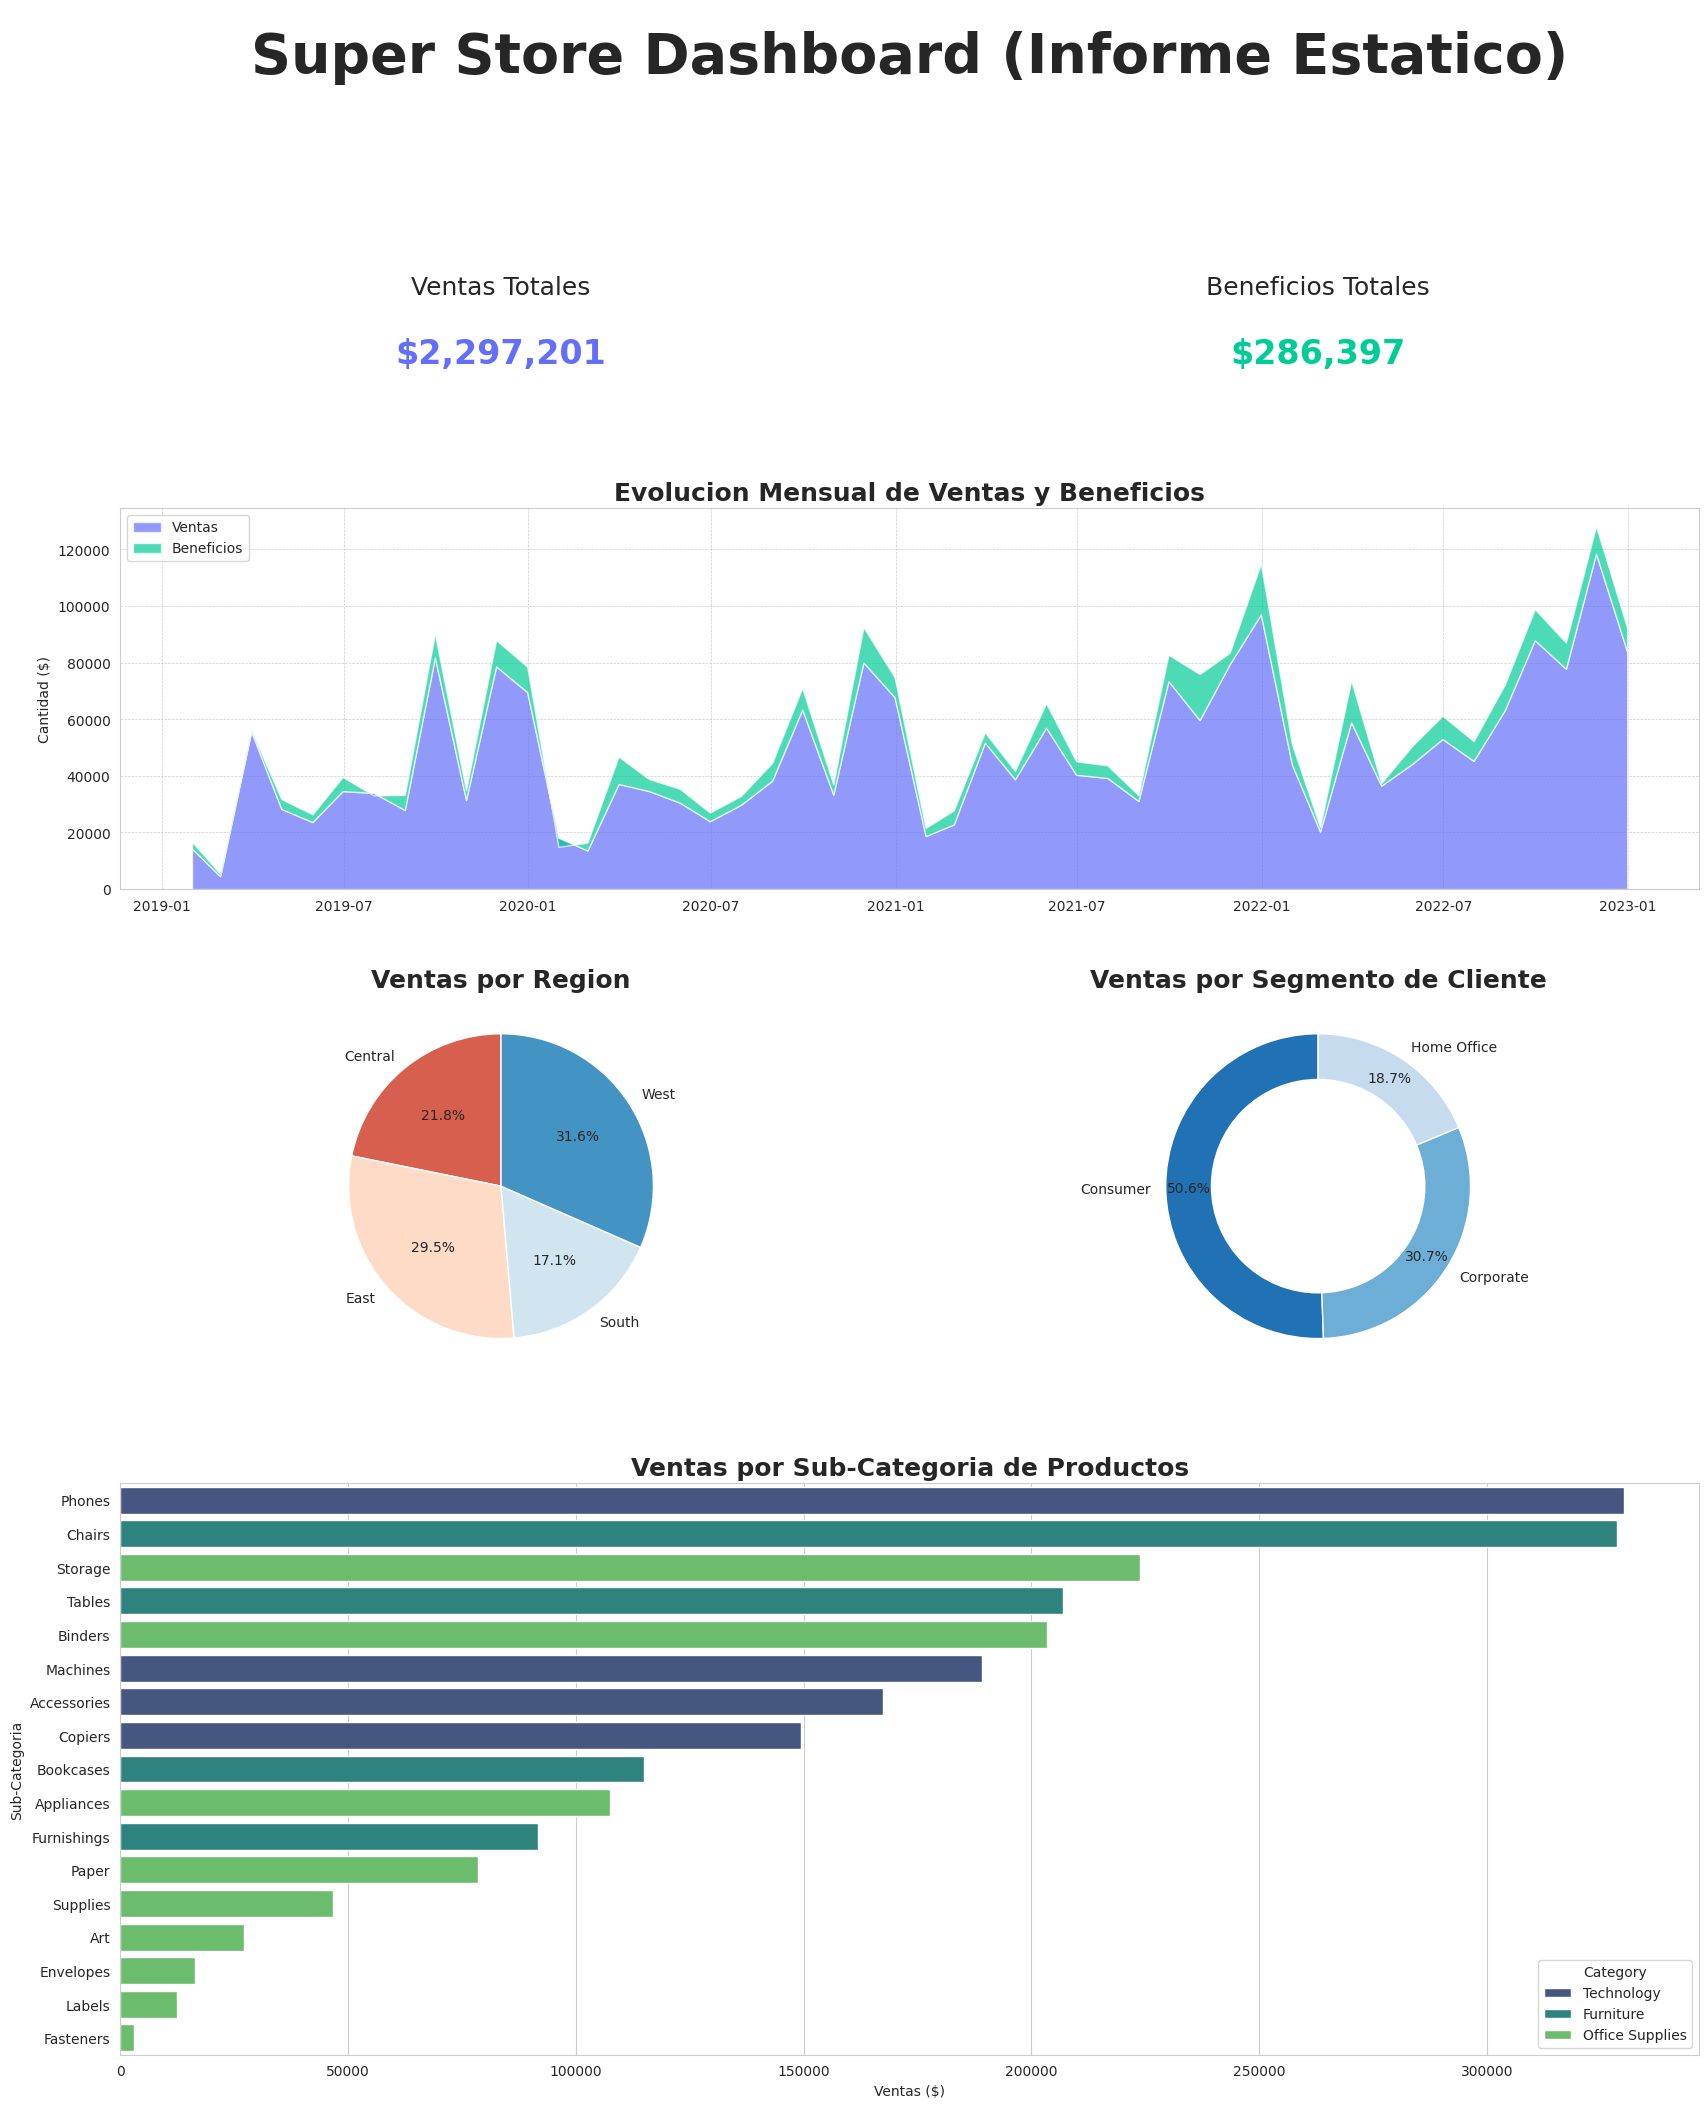

In [2]:
#Importo las respectivas librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

#Convierto la columna de Order Data a tipo Fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

sales_profit_over_time = df.set_index('Order Date').resample('ME').agg({'Sales': 'sum', 'Profit': 'sum'})

#KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()

#Datos para graficos de tiempos
sales_profit_over_time = df.set_index('Order Date').resample('ME').agg({'Sales': 'sum', 'Profit': 'sum'})

#Datos para Graficos pie (Region)
sales_by_region = df.groupby('Region')['Sales'].sum()
total_sales = sales_by_region.sum()

#Datos para Dona (Segmento)
sales_by_segment = df.groupby('Segment')['Sales'].sum()
total_sales_segment = sales_by_segment.sum()

#Datos para Subcategorias
sales_by_sub_category = df.groupby(['Sub-Category', 'Category'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending=False)

#Configurar estilo para los graficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 22)
plt.rcParams['font.family'] = 'sans-serif'

#Crear figura y un layout complejo con GridSpec
fig = plt.figure()
gs = gridspec.GridSpec(5, 2, figure=fig, height_ratios=[0.5, 1, 2, 2, 3])

#Titulo Principal
ax_title = fig.add_subplot(gs[0, :])
ax_title.text(0.5, 0.5, 'Super Store Dashboard (Informe Estatico)', fontsize=40, ha='center', va= 'center', fontweight = 'bold')
ax_title.axis('off')

#KPIs
def create_kpi_box(ax, title, value, color):
  ax.text(0.5, 0.6, title, ha='center', va='center', fontsize=18)
  ax.text(0.5, 0.25, value, ha='center', va='center', fontsize=24, fontweight='bold', color=color)
  ax.axis('off')

ax_kpi1 = fig.add_subplot(gs[1, 0])
create_kpi_box(ax_kpi1, 'Ventas Totales', f'${total_sales:,.0f}', '#636EFA')

ax_kpi2 = fig.add_subplot(gs[1, 1])
create_kpi_box(ax_kpi2, 'Beneficios Totales', f'${total_profit:,.0f}', '#00CC96')

#Visualizacion Tipo Area
ax_area = fig.add_subplot(gs[2, :])
ax_area.stackplot(sales_profit_over_time.index, sales_profit_over_time['Sales'], sales_profit_over_time['Profit'], labels=['Ventas', 'Beneficios'], colors=['#636EFA', '#00CC96'], alpha=0.7)
ax_area.set_title('Evolucion Mensual de Ventas y Beneficios', fontsize=18, fontweight='bold')
ax_area.set_ylabel('Cantidad ($)')
ax_area.legend(loc='upper left')
ax_area.grid(True, which='both', linestyle='--', linewidth=0.5)

#Pie (Region)
ax_pie = fig.add_subplot(gs[3, 0])
ax_pie.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('RdBu', len(sales_by_region)))
ax_pie.set_title('Ventas por Region', fontsize=18, fontweight='bold')

#Grafico de Dona x Segmento
ax_donut = fig.add_subplot(gs[3, 1])
ax_donut.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,colors=sns.color_palette('Blues_r', len(sales_by_segment)))
#Relleno en el centro para crear la dona
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax_donut.add_artist(centre_circle)
ax_donut.set_title('Ventas por Segmento de Cliente', fontsize=18, fontweight='bold')

#Subcategoria
ax_bar = fig.add_subplot(gs[4, :])
sns.barplot(x='Sales', y='Sub-Category', data=sales_by_sub_category, hue='Category', dodge=False, ax=ax_bar, palette='viridis')
ax_bar.set_title('Ventas por Sub-Categoria de Productos', fontsize=18, fontweight='bold')
ax_bar.set_xlabel('Ventas ($)')
ax_bar.set_ylabel('Sub-Categoria')

plt.tight_layout(pad=4.0)
plt.show()